# Explore here

In [1]:
# Your code here

import os
import pandas as pd
import requests
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

# 1. descargar data

url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
respuesta = requests.get(url)
nombre_archivo = "diabetes.csv"
with open(nombre_archivo, 'wb') as archivo:
     archivo.write(respuesta.content)

# 2. convertir csv en dataframe

total_data = pd.read_csv("../data/raw/diabetes.csv")
# total_data.shape
# 768, 9

# borrar duplicados
total_data_sin = total_data.drop_duplicates()  
total_data_sin.shape
# 768, 9 = no hay duplicados

total_data.info()

# non null valores = 0
# todas las variables son numericas

ncols = total_data.columns.tolist()
print(ncols)

total_data_drop = total_data.drop(['SkinThickness'], axis=1)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


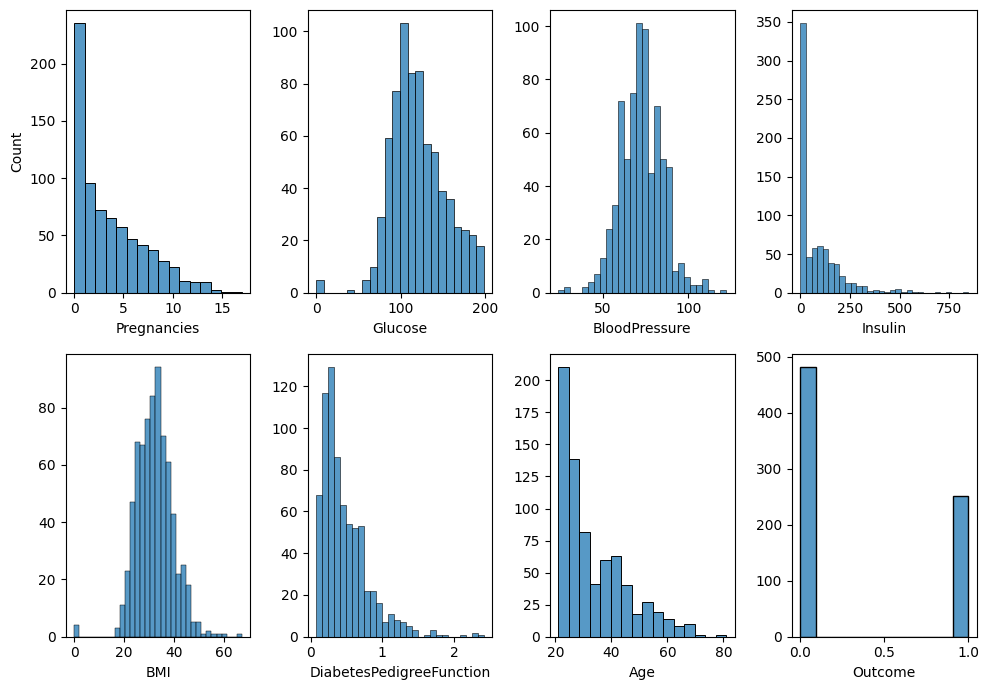

In [2]:
# hay un error en los valores de "BloodPressure" = valores = 0 no son posibles

total_data_drop_fil = total_data_drop[(total_data_drop['BloodPressure'] != 0) ]
total_data_drop_fil.shape


fig, axis = plt.subplots(2, 4, figsize = (10, 7), gridspec_kw={'height_ratios': [1, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data_drop_fil, x = "Pregnancies").set(xlabel = "Pregnancies")
sns.histplot(ax = axis[0, 1], data = total_data_drop_fil, x = "Glucose").set(xlabel = "Glucose", ylabel = None)
sns.histplot(ax = axis[0, 2], data = total_data_drop_fil, x = "BloodPressure").set(xlabel = "BloodPressure", ylabel = None)
sns.histplot(ax = axis[0, 3], data = total_data_drop_fil, x = "Insulin").set(xlabel = "Insulin", ylabel = None)
sns.histplot(ax = axis[1, 0], data = total_data_drop_fil, x = "BMI").set(xlabel = "BMI", ylabel = None)
sns.histplot(ax = axis[1, 1], data = total_data_drop_fil, x = "DiabetesPedigreeFunction").set(xlabel = "DiabetesPedigreeFunction", ylabel = None)
sns.histplot(ax = axis[1, 2], data = total_data_drop_fil, x = "Age").set(xlabel = "Age", ylabel = None)
sns.histplot(ax = axis[1, 3], data = total_data_drop_fil, x = "Outcome").set(xlabel = "Outcome", ylabel = None)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

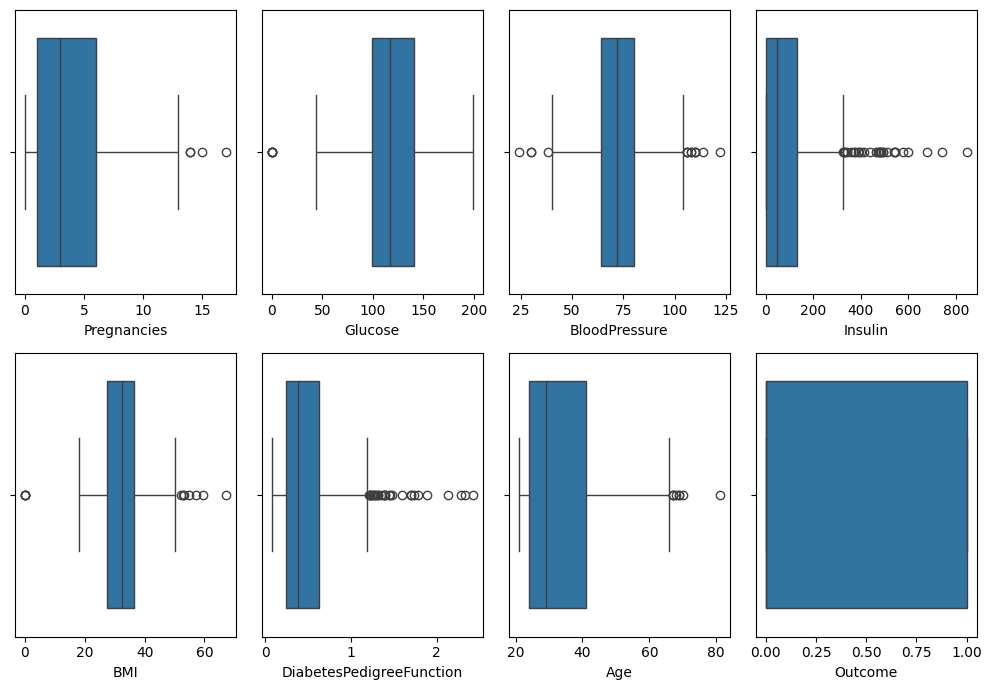

In [3]:
fig, axis = plt.subplots(2, 4, figsize = (10, 7), gridspec_kw={'height_ratios': [1, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.boxplot(ax = axis[0, 0], data = total_data_drop_fil, x = "Pregnancies").set(xlabel = "Pregnancies")
sns.boxplot(ax = axis[0, 1], data = total_data_drop_fil, x = "Glucose").set(xlabel = "Glucose", ylabel = None)
sns.boxplot(ax = axis[0, 2], data = total_data_drop_fil, x = "BloodPressure").set(xlabel = "BloodPressure", ylabel = None)
sns.boxplot(ax = axis[0, 3], data = total_data_drop_fil, x = "Insulin").set(xlabel = "Insulin", ylabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data_drop_fil, x = "BMI").set(xlabel = "BMI", ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data_drop_fil, x = "DiabetesPedigreeFunction").set(xlabel = "DiabetesPedigreeFunction", ylabel = None)
sns.boxplot(ax = axis[1, 2], data = total_data_drop_fil, x = "Age").set(xlabel = "Age", ylabel = None)
sns.boxplot(ax = axis[1, 3], data = total_data_drop_fil, x = "Outcome").set(xlabel = "Outcome", ylabel = None)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

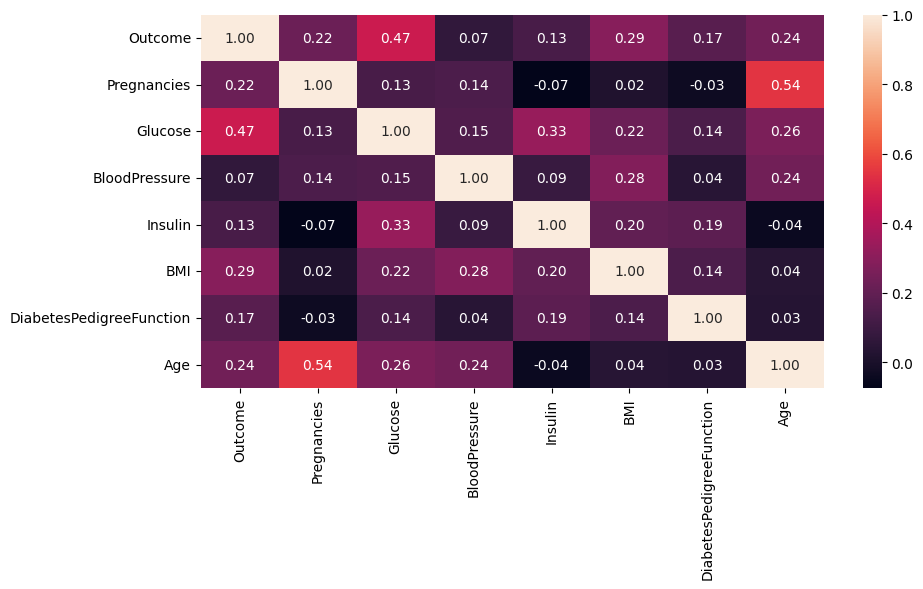

In [4]:
# analisis de correlaciones

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[['Outcome', 'Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age' ]].corr(), annot = True, fmt = ".2f")
plt.tight_layout()
plt.show()




In [5]:
# bloodpresure tiene una corrralcion muy debil con el outcome asi que la podemos eliminar

total_data_eda = total_data_drop_fil.drop(['BloodPressure'], axis=1)
print(total_data_eda.head())

# reducir outliers en "insulin" y "DiabetesPedigreeFunction"

   Pregnancies  Glucose  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148        0  33.6                     0.627   50        1
1            1       85        0  26.6                     0.351   31        0
2            8      183        0  23.3                     0.672   32        1
3            1       89       94  28.1                     0.167   21        0
4            0      137      168  43.1                     2.288   33        1


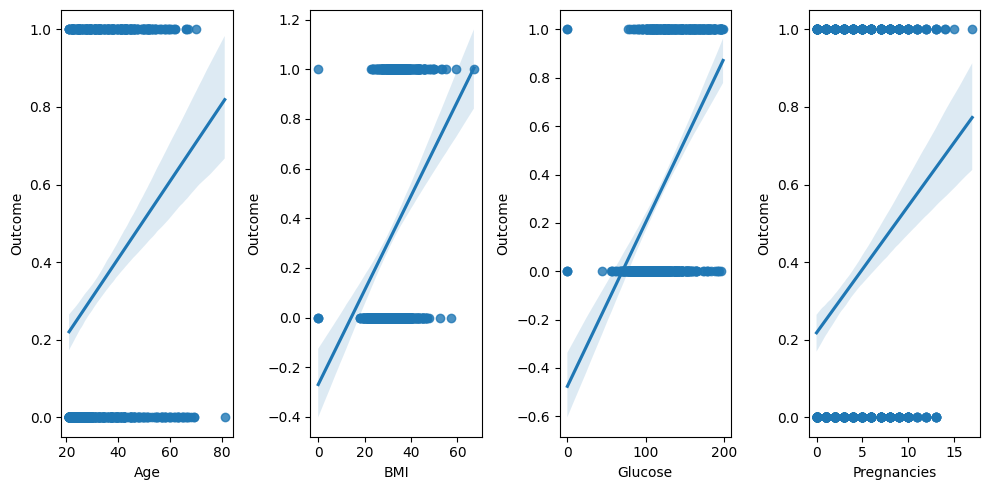

In [6]:
# corroboramos teoria vista en matriz de correlacion 

fig, axis = plt.subplots(figsize = (10, 5), ncols = 4)

sns.regplot(ax = axis[0], data = total_data_eda, x = "Age", y = "Outcome")
sns.regplot(ax = axis[1], data = total_data_eda, x = "BMI", y = "Outcome")
sns.regplot(ax = axis[2], data = total_data_eda, x = "Glucose", y = "Outcome")
sns.regplot(ax = axis[3], data = total_data_eda, x = "Pregnancies", y = "Outcome")

plt.tight_layout()

plt.show()

In [7]:
total_data_eda.describe()

# las avariables con mas outliers son DiabetesPedigreeFunction y Insulin, pero no son las mas importantes, asi que dejmaos los ouitliers

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000
mean,3.855389,121.042292,83.609823,32.292769,0.475861,33.361528,0.343793
std,3.358106,32.179943,116.606997,7.271540,0.334179,11.837077,0.475297
min,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,0.000000,27.400000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,45.000000,32.300000,0.380000,29.000000,0.000000
75%,6.000000,141.000000,130.000000,36.600000,0.629000,41.000000,1.000000
max,17.000000,199.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# split train y test

from sklearn.model_selection import train_test_split

# Dividimos el conjunto de datos en muestras de train y test
X = total_data.drop("Outcome", axis = 1)
y = total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()


# escalado de valores 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index)

X_train_norm.head()
X_test_norm.head()


,0,1,2,3,4,5,6,7
668,0.681856,-0.714020,-0.617127,0.817110,0.934749,0.260736,-0.116372,0.878091
324,-0.526397,-0.276643,0.301916,0.752265,-0.701206,0.480535,-0.954231,-1.035940
624,-0.526397,-0.401608,-0.292759,-1.322774,-0.701206,-0.153005,-0.924520,-1.035940
690,1.285983,-0.432849,0.572222,-1.322774,-0.701206,-0.954627,1.149329,0.095078
473,0.983919,0.473147,1.112835,-1.322774,-0.701206,-0.269369,-0.770021,1.487101


In [9]:
X_train_norm["Outcome"] = list(y_train)
X_test_norm["Outcome"] = list(y_test)

X_train_norm.to_csv("../data/processed/clean_diabetes_train.csv", index=False)
X_test_norm.to_csv("../data/processed/clean_diabetes_test.csv", index=False)

# EDA COMPLETADO !!!!



In [11]:
# Leer el conjunto de datos de entrenamiento desde un archivo CSV
train_df = pd.read_csv('../data/processed/clean_diabetes_train.csv')
print("Conjunto de datos de entrenamiento:", train_df.head())


# Leer el conjunto de datos de prueba desde un archivo CSV
test_df = pd.read_csv('../data/processed/clean_diabetes_test.csv')
print("\nConjunto de datos de prueba:", test_df.head())

# Separar las características y la variable objetivo para el conjunto de entrenamiento
X_train = train_df.drop(columns='Outcome')
y_train = train_df['Outcome']

# Separar las características y la variable objetivo para el conjunto de prueba
X_test = test_df.drop(columns='Outcome')
y_test = test_df['Outcome']

Conjunto de datos de entrenamiento:           0         1         2         3         4         5         6  \
0 -0.526397 -1.151398 -3.752683 -1.322774 -0.701206 -4.135256 -0.490735   
1  1.588046 -0.276643  0.680345  0.233505 -0.701206 -0.489169  2.415030   
2 -0.828460  0.566871 -1.265862 -0.090720  0.013448 -0.424522  0.549161   
3 -1.130523  1.254179 -1.049617 -1.322774 -0.701206 -1.303720 -0.639291   
4  0.681856  0.410665  0.572222  1.076490  2.484601  1.838121 -0.686829   

          7  Outcome  
0 -1.035940        0  
1  1.487101        1  
2 -0.948939        0  
3  2.792122        0  
4  1.139095        1  

Conjunto de datos de prueba:           0         1         2         3         4         5         6  \
0  0.681856 -0.714020 -0.617127  0.817110  0.934749  0.260736 -0.116372   
1 -0.526397 -0.276643  0.301916  0.752265 -0.701206  0.480535 -0.954231   
2 -0.526397 -0.401608 -0.292759 -1.322774 -0.701206 -0.153005 -0.924520   
3  1.285983 -0.432849  0.572222 -1.322774 -0.

<Axes: >

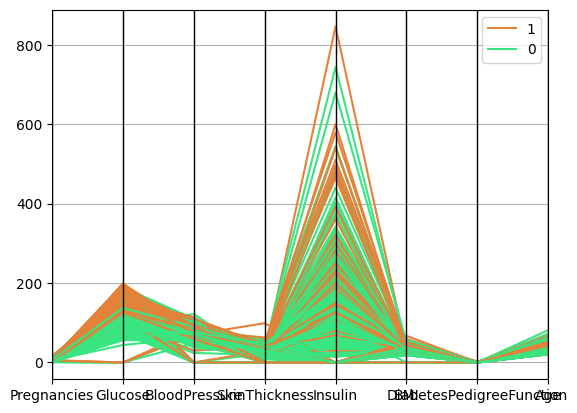

In [12]:
import pandas as pd

total_data = X
total_data["Name"] = y

pd.plotting.parallel_coordinates(total_data, "Name", color = ("#E58139", "#39E581", "#ffff00","#ff0000"))

In [13]:
# TEST ARBOL DE REGRESION

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

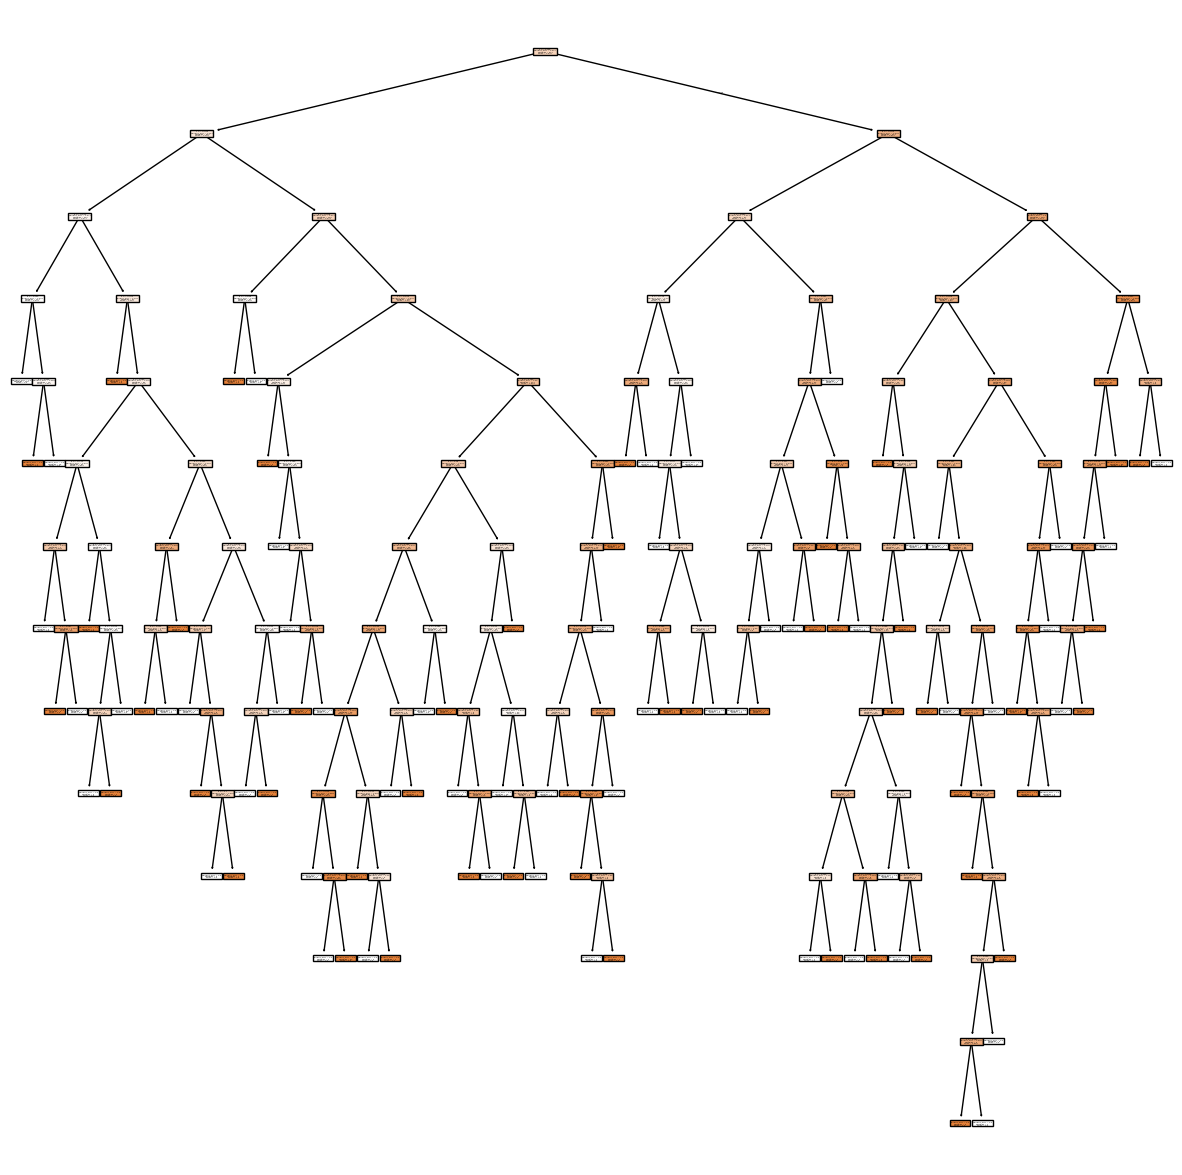

In [14]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["Pregnancies" , "Glucose", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"], filled = True)

plt.show()

In [15]:
y_pred = model.predict(X_test)
y_pred

from sklearn.metrics import mean_squared_error

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")

Error cuadrático medio: 0.2532467532467532


In [16]:
from pickle import dump
dump(model, open("decision_tree_regressor_default_42.sav", "wb"))

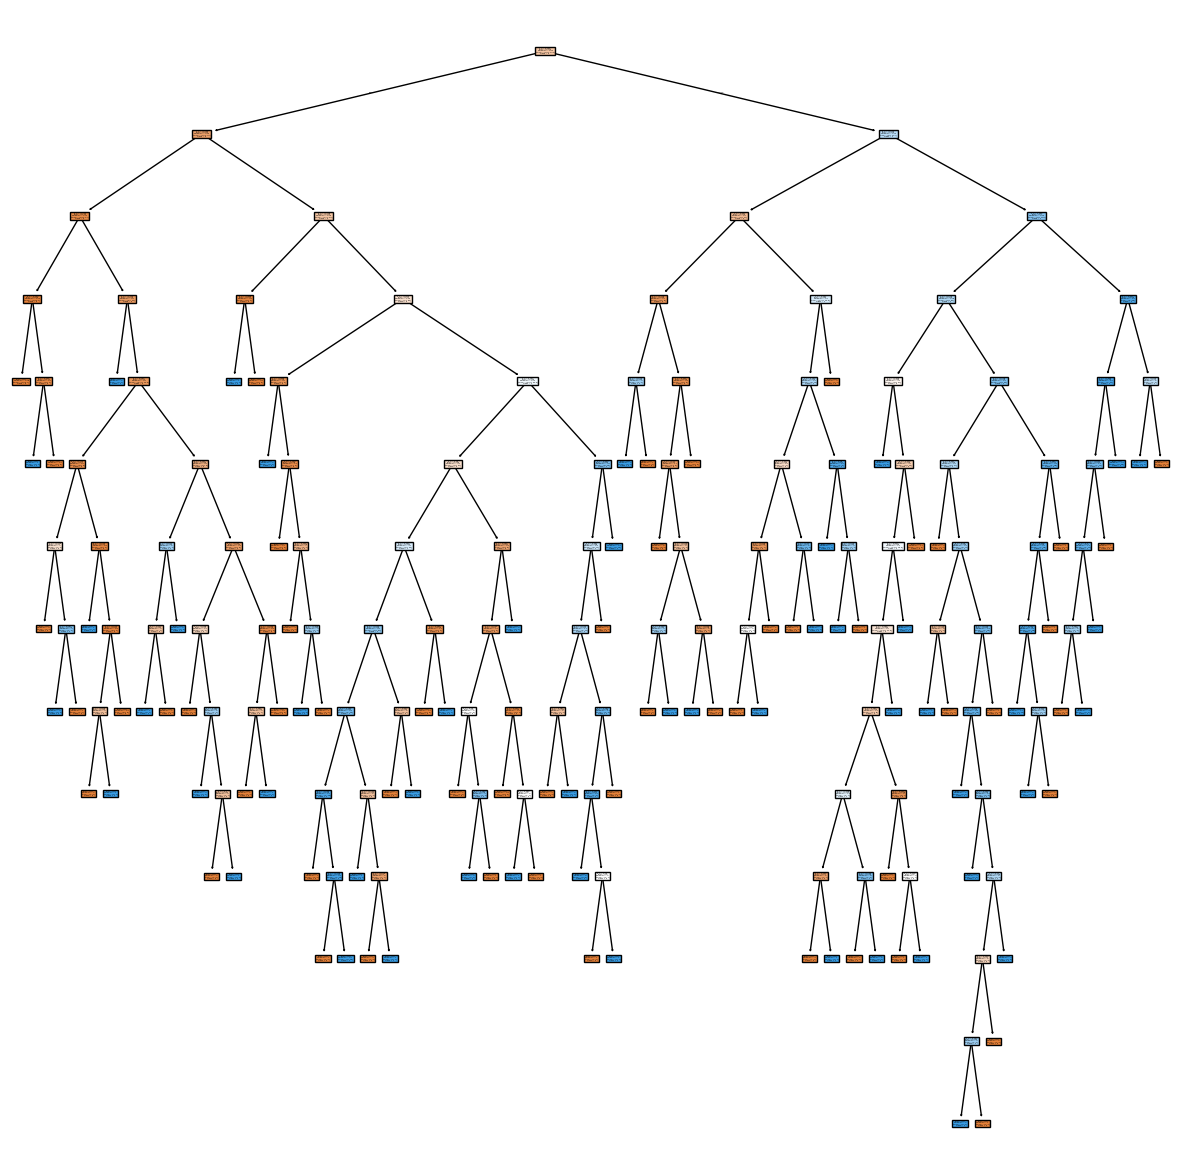

In [17]:
# TEST ARBOL DE CLASIFICACION

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [18]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [19]:
from sklearn.metrics import accuracy_score, classification_report


print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

0.7467532467532467


In [20]:
from pickle import dump

dump(model, open("decision_tree_classifier_default_42.sav", "wb"))

In [21]:
# OPTIMIZACION CLASSIFIER TREE

from sklearn.model_selection import GridSearchCV

# Crear el modelo de árbol de decisión
dtc = DecisionTreeClassifier(random_state=42)

# Definir los parámetros de búsqueda
param_grid = {
    'criterion': ['gini', 'entropy'],  # Función de medida de la calidad de una división
    'max_depth': [None, 10, 20, 30, 40, 50],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras necesarias para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras necesarias en una hoja
    'max_features': [None, 'sqrt', 'log2'],  # Número de características a considerar para la mejor división
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print("Mejores parámetros encontrados:", best_params)

# Mejores parámetros encontrados: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_spli

In [22]:
best_model = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth= 5, 
    max_features= 4, 
    min_samples_leaf= 3, 
    min_samples_split=15,
    random_state=40
)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", accuracy)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

dump(model, open("decision_tree_classifier_tweaked_40.sav", "wb"))

Precisión en el conjunto de prueba: 0.7857142857142857

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        99
           1       0.72      0.65      0.69        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154

